In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import warnings
from mpl_toolkits.axes_grid1 import make_axes_locatable
warnings.simplefilter('ignore')

## Read cleaned data from file

In [2]:
cleaned_df = pd.read_csv('data/data_processed.csv')
cleaned_df.head(10)

,settlement_date,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,non_bm_stor,pump_storage_pumping,ifa_flow,ifa2_flow,britned_flow,moyle_flow,east_west_flow,nemo_flow,is_holiday,settlement_time,datetime
0,2009-01-01,33504,35379.0,29927,62,1403,0,0,0,1235,916,0,0,-40,0,0,1,00:00,2009-01-01 00:00:00
1,2009-01-01,37910,38704.0,33939,54,1403,0,0,0,33,2002,0,0,-161,0,0,1,00:30,2009-01-01 00:30:00
2,2009-01-01,38047,38964.0,34072,53,1403,0,0,0,157,2002,0,0,-160,0,0,1,01:00,2009-01-01 01:00:00
3,2009-01-01,37380,38651.0,33615,53,1403,0,0,0,511,2002,0,0,-160,0,0,1,01:30,2009-01-01 01:30:00
4,2009-01-01,36426,37775.0,32526,50,1403,0,0,0,589,1772,0,0,-160,0,0,1,02:00,2009-01-01 02:00:00
5,2009-01-01,35687,37298.0,31877,50,1403,0,0,0,851,1753,0,0,-160,0,0,1,02:30,2009-01-01 02:30:00
6,2009-01-01,35408,37135.0,31604,43,1403,0,0,0,967,1754,0,0,-160,0,0,1,03:00,2009-01-01 03:00:00
7,2009-01-01,34322,36844.0,30486,43,1403,0,0,0,1762,1754,0,0,-160,0,0,1,03:30,2009-01-01 03:30:00
8,2009-01-01,33076,35678.0,29390,56,1403,0,0,0,1842,1755,0,0,-160,0,0,1,04:00,2009-01-01 04:00:00
9,2009-01-01,31970,34635.0,28452,56,1403,0,0,0,1905,1755,0,0,-160,0,0,1,04:30,2009-01-01 04:30:00


In [3]:
# convert the date column to datetime
cleaned_df['settlement_date'] = pd.to_datetime(cleaned_df['settlement_date'])

### Visualize the data

#### Analyze electricity demand over time

Text(0, 0.5, 'Net Demand (MWh)')

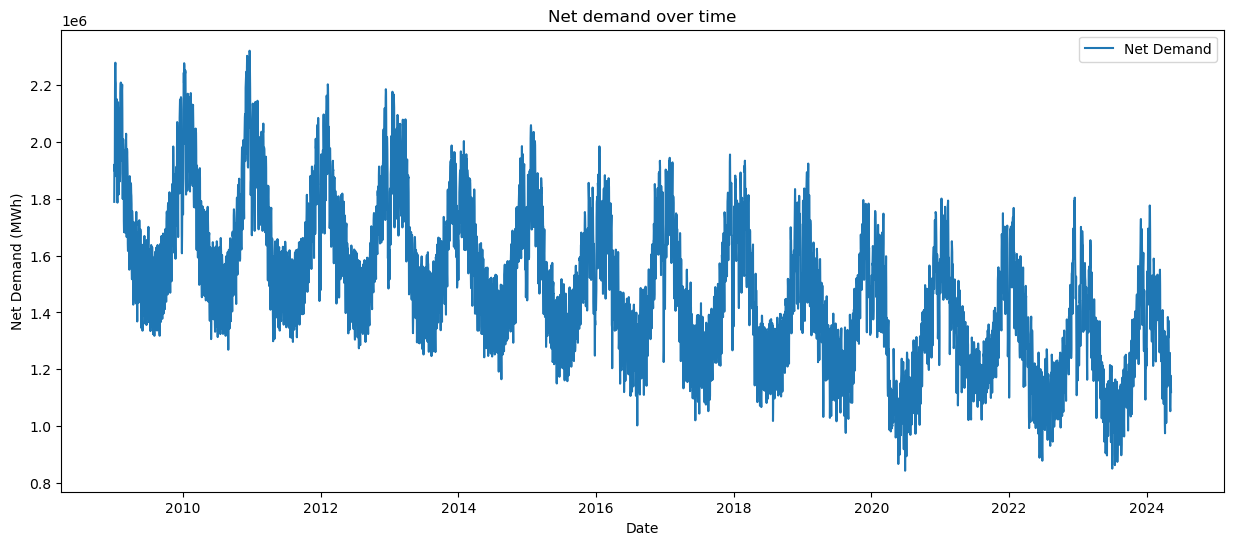

In [4]:
#cleaned_df = cleaned_df.set_index('settlement_date')
# plot tsd and nd using sns
cleaned_df.reset_index(inplace=True)
plt.figure(figsize=(15, 6))
ndPlotDat = cleaned_df["nd"].groupby(cleaned_df["settlement_date"]).sum()
sns.lineplot(data=ndPlotDat, label='Net Demand')
plt.title('Net demand over time')
plt.xlabel('Date')
plt.ylabel('Net Demand (MWh)')


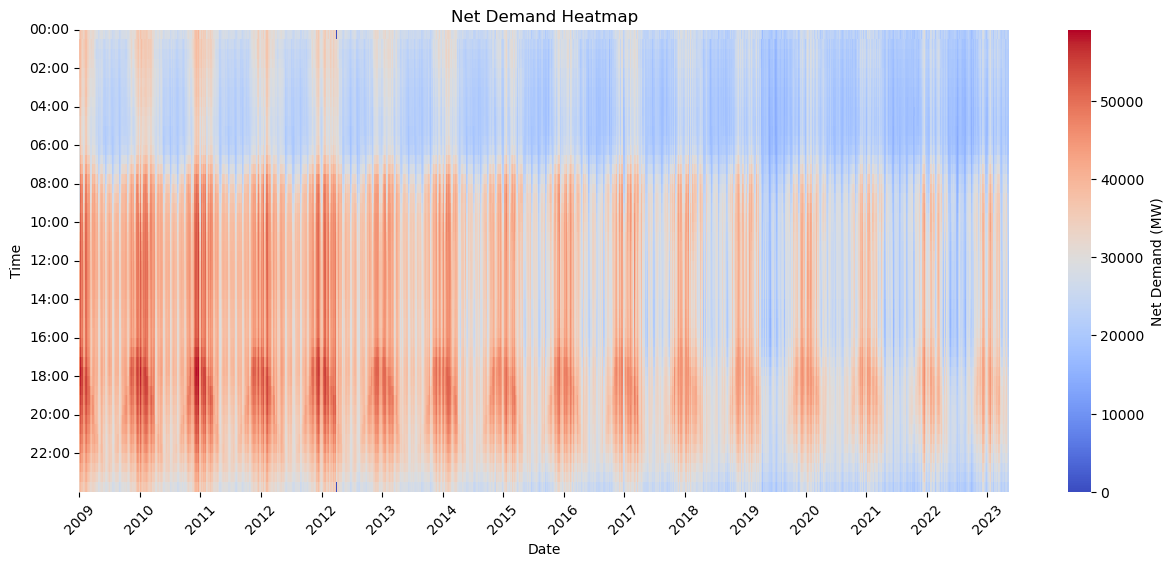

In [5]:
# plot tsd heatmap
# create a pivot table
pivot_tsd = cleaned_df.pivot_table(index='settlement_time', columns='settlement_date', values='nd', aggfunc='sum')
pivot_tsd = pivot_tsd.fillna(0)
pivot_tsd = pivot_tsd.sort_index(ascending=True)
plt.figure(figsize=(15, 6))
ax=sns.heatmap(pivot_tsd, cmap='coolwarm')
ax.collections[0].colorbar.set_label('Net Demand (MW)')
plt.title('Net Demand Heatmap')
# format date on x-axis to only show year
plt.xticks(np.arange(0, len(pivot_tsd.columns), 365), [x.strftime('%Y') for x in pivot_tsd.columns[::365]])
plt.xticks(rotation=45)
# format time on y-axis to only show 2 hours
plt.yticks(np.arange(0, len(pivot_tsd.index), 4), pivot_tsd.index[::4])
plt.xlabel('Date')
plt.ylabel('Time')
plt.show()

Plot the transmission demand over time to see if there are any trends or patterns.

Plot the transmission demand minus net demand

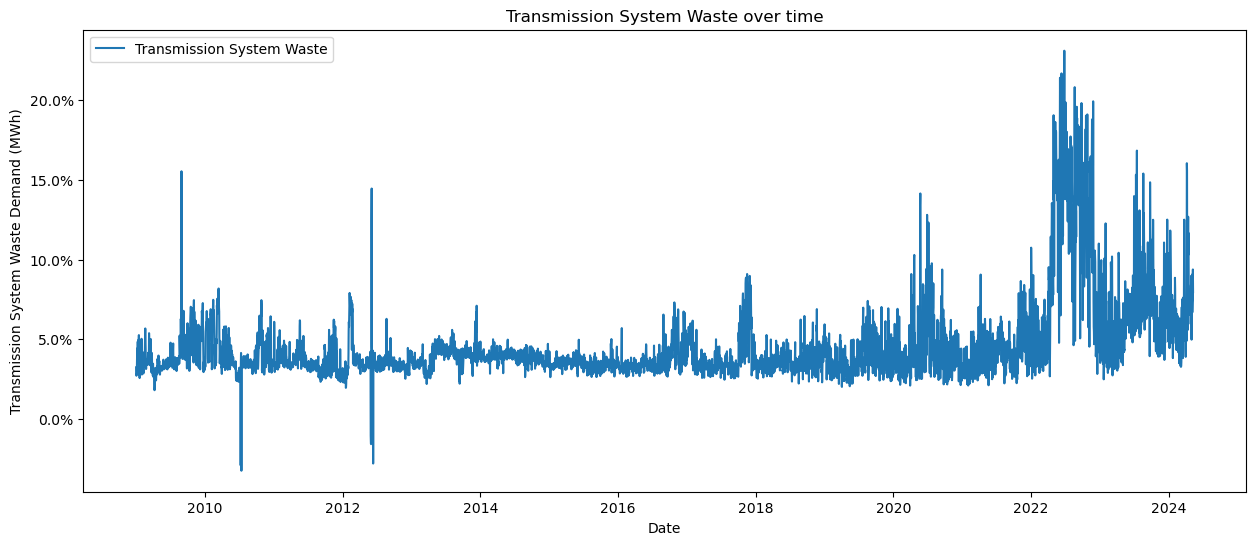

In [7]:
#cleaned_df = cleaned_df.set_index('settlement_date')
# plot tsd and nd using sns
plt.figure(figsize=(15, 6))
transmissionSystemWastePercentage = (cleaned_df["tsd"].groupby(cleaned_df["settlement_date"]).sum() - cleaned_df["nd"].groupby(cleaned_df["settlement_date"]).sum())/cleaned_df["tsd"].groupby(cleaned_df["settlement_date"]).sum()
sns.lineplot(data=transmissionSystemWastePercentage, label='Transmission System Waste')
plt.title('Transmission System Waste over time')
plt.xlabel('Date')
plt.ylabel('Transmission System Waste Demand (MWh)')
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(1))




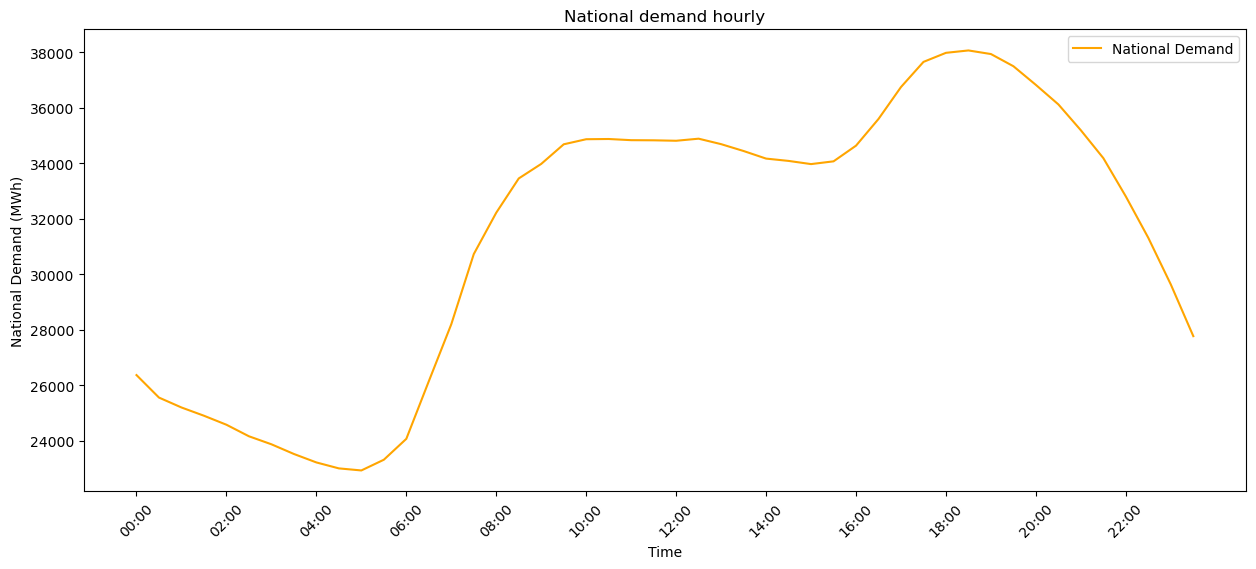

In [8]:
#cleaned_df = cleaned_df.set_index('settlement_date')
# plot tsd groupby hourly
plt.figure(figsize=(15, 6))
tsdPlotDat = cleaned_df["nd"].groupby(cleaned_df["settlement_time"]).mean()
sns.lineplot(data=tsdPlotDat, label='National Demand', color='orange')
plt.title('National demand hourly')
plt.xlabel('Time')
plt.ylabel('National Demand (MWh)')
plt.xticks(rotation=45);
plt.xticks(np.arange(0, len(tsdPlotDat), 4), tsdPlotDat.index[::4]);


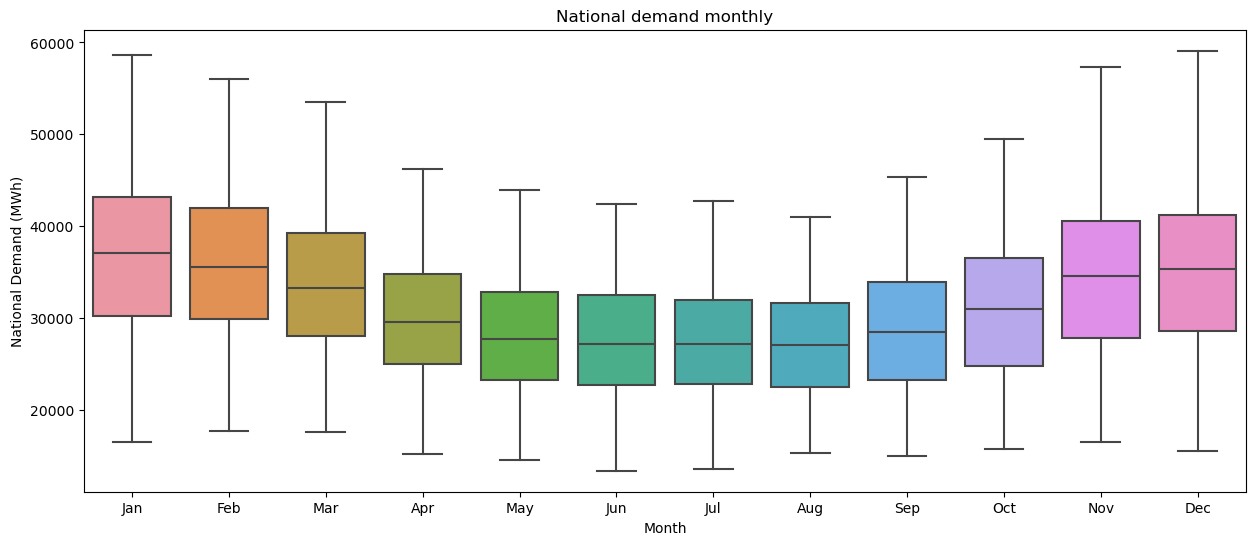

In [17]:
#cleaned_df = cleaned_df.set_index('settlement_date')
# plot tsd groupby monthly on boxplot
plt.figure(figsize=(15, 6))
sns.boxplot(x=cleaned_df["settlement_date"].dt.month, y=cleaned_df["nd"])
plt.title('National demand monthly')
plt.xlabel('Month')
plt.ylabel('National Demand (MWh)')
plt.xticks(np.arange(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']);
plt.show()
